In [1]:
!pip install diffusers==0.27.2 transformers==4.38.2 accelerate==0.28.0 safetensors==0.4.2 
!pip install huggingface_hub==0.20.3


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [1]:
# image description to ghibli image
import torch
from diffusers import StableDiffusionImg2ImgPipeline
from PIL import Image
import matplotlib.pyplot as plt


from transformers import BlipProcessor, BlipForConditionalGeneration


/Users/jigisha/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# STEP 1: Describe Image

In [2]:
# Load BLIP (image captioning model)
blip_processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Load and prepare image
image_path = "/Users/jigisha/Downloads/jab_we_met_without_title.jpeg"
init_image = Image.open(image_path).convert("RGB").resize((512, 512))

# Describe image
inputs = blip_processor(init_image, return_tensors="pt")
with torch.no_grad():
    out = blip_model.generate(**inputs)
description = blip_processor.decode(out[0], skip_special_tokens=True)

/Users/jigisha/opt/anaconda3/lib/python3.9/site-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


# STEP 2: Compose prompt 

In [3]:

prompt = f"{description}, in Ghibli-style illustration"
print(f"🔍 Auto-generated prompt: {prompt}")

🔍 Auto-generated prompt: a man and woman standing in a field, in Ghibli-style illustration


# STEP 3: Load Ghibli image-to-image pipeline

In [4]:
# Use StableDiffusionImg2ImgPipeline 
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "nitrosocke/ghibli-diffusion",
    torch_dtype=torch.float32  # use float16 for GPU
).to("cpu")
pipe.enable_attention_slicing()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

# STEP 4: Stylize the image 

  0%|          | 0/30 [00:00<?, ?it/s]

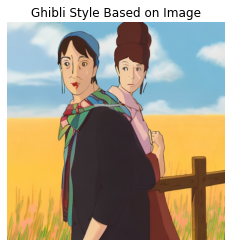

In [16]:
# === STEP 4: Stylize the image ===
result = pipe(
    prompt=prompt,
    image=init_image,
    strength=0.6,
    guidance_scale=8.0
)
output_image = result.images[0]

# === STEP 5: Save and show result ===
output_image.save("ghibli_stylized_with_caption.png")
plt.imshow(output_image)
plt.axis("off")
plt.title("Ghibli Style Based on Image")
plt.show()
